# Analyze data from a GPS Fitness Tracker
With the explosion in fitness tracker popularity, runners all of the world are collecting data with gadgets (smartphones, watches, etc.) to keep themselves motivated. They look for answers to questions like:<br>

- How fast, long, and intense was my run today?<br>
- Have I succeeded with my training goals?<br>
- Am I progressing?<br>
- What were my best achievements?<br>
- How do I perform compared to others?<br>

The data is a CSV file where each row is a single training activity. In this project, we'll create, import, clean, and analyze the data to answer the above questions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

## Importing the data
First, we load the data.

In [2]:
runkeeper_file = 'datasets/cardioActivities.csv'
df_activities = pd.read_csv(runkeeper_file, parse_dates=True, index_col='Date')
display(df_activities.sample(3))
df_activities.info()

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2012-08-22 18:53:54,706d4d6b-767d-40aa-81c9-e5e85a102051,Running,NaN,5.69,31:08,5:29,10.95,4072685.0,32,NaN,NaN,NaN,2012-08-22-185354.gpx
2017-12-27 18:50:24,c0706fc2-7192-4c28-b1f4-0553dc423ded,Running,NaN,8.29,45:56,5:33,10.83,622.0,131,147.0,NaN,TomTom MySports Watch,2017-12-27-185024.gpx
2018-01-14 12:48:41,039df468-14d0-4fdd-8496-c9f06f5a5d47,Running,NaN,13.01,1:12:44,5:35,10.73,910.0,180,153.0,NaN,TomTom MySports Watch,2018-01-14-124841.gpx


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

## Preprocessing the data

1. Define list of columns to be deleted<br>
2. Delete unnecessary columns<br>
3. Count types of training activities<br>
4. Rename 'Other' type to 'Unicycling'<br>
5. Count missing values for each column<br>

In [3]:
cols_to_drop=['Friend\'s Tagged','Route Name', 'GPX File', 'Activity Id', 'Calories Burned', 'Notes']
df_activities.drop(cols_to_drop, axis=1, inplace=True)
display(df_activities['Type'].value_counts())
df_activities['Type'] = df_activities['Type'].str.replace('Other', 'Unicycling')    
df_activities.isnull().sum()

Type
Running    459
Cycling     29
Walking     18
Other        2
Name: count, dtype: int64

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

## Filling in missing values
To fill in the 214 missing heart rate entries, we'll use *mean imputation*, which is computing the mean of the existing values and assigning them to the missing ones.
1. Calculate sample means for heart rate for each training activity type 
2. Split whole DataFrame into several, specific for different activities
3. Filling missing values with counted means  
4. Count missing values for each column in running data


In [4]:
avg_hr_run = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()
df_run = df_activities[df_activities['Type'] == 'Running'].copy()
df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()
df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()
df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle), inplace=True)
df_run.isnull().sum()

C:\Users\cpgem\AppData\Local\Temp\ipykernel_18528\3933893369.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
C:\Users\cpgem\AppData\Local\Temp\ipykernel_18528\3933893369.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

## Plotting the data

To plot the data, we'll use a figure with a subplot for each metric (```Distance```, ```Average Speed```, ```Climb``` and ```Average Heart Rate```), in function of time (the ```Date``` column)

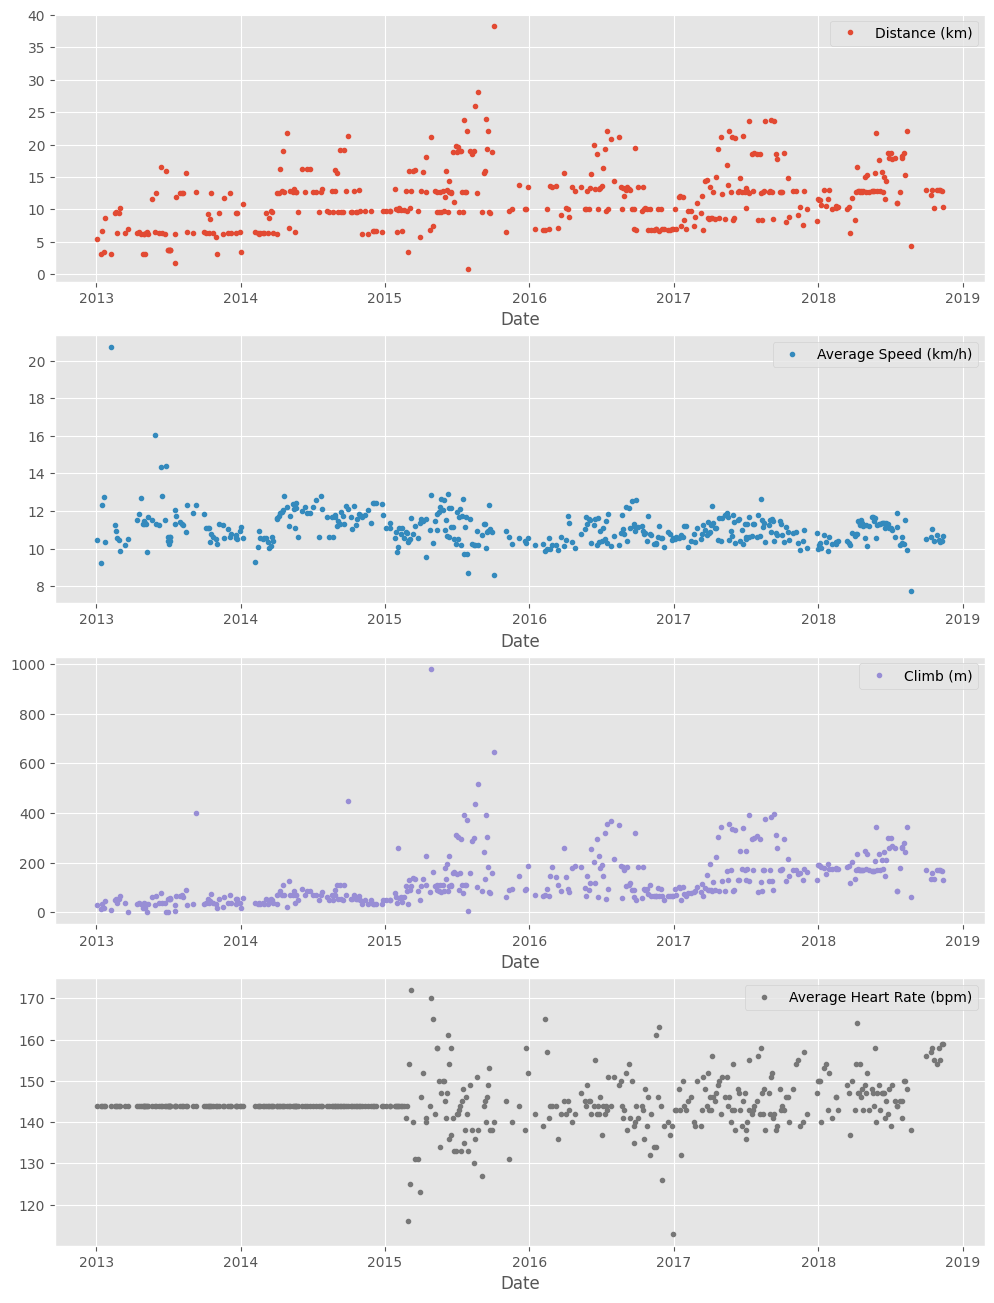

In [5]:
plt.style.use('ggplot')
df_run = df_run.sort_index()
runs_subset_2013_2018 = df_run.loc['20130101':'20181231']
runs_subset_2013_2018.plot(subplots=True,
                           sharex=False,
                           figsize=(12,16),
                           linestyle='none',
                           marker='o',
                           markersize=3)
plt.show()

## Statistical analysis

We'll calculate the annual and weekly statistics of the data. In order to do that, we'll use the ```resample()``` method, which is the equivalent of the ```groupby()``` method for time series.

In [6]:
runs_subset_2015_2018 = df_run.loc['2015-01-01':'20190101']
print('Average run in the last 4 years:')
display(runs_subset_2015_2018[['Distance (km)', 'Average Speed (km/h)', 'Climb (m)', 'Average Heart Rate (bpm)']].resample('YE').mean())
print('Weekly averages of last 4 years:')
display(runs_subset_2015_2018[['Distance (km)', 'Average Speed (km/h)', 'Climb (m)', 'Average Heart Rate (bpm)']].resample('W').mean().mean())
weekly_counts_average = runs_subset_2015_2018['Distance (km)'].resample('W').count().mean()
print('Average training sessions per week:', weekly_counts_average)

Average run in the last 4 years:


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-12-31,13.602805,10.998902,160.170732,143.353659
2016-12-31,11.411667,10.837778,133.194444,143.388889
2017-12-31,12.935176,10.959059,169.376471,145.247059
2018-12-31,13.339063,10.777969,191.218750,148.125000


Weekly averages of last 4 years:


Distance (km)                12.518176
Average Speed (km/h)         10.835473
Climb (m)                   158.325444
Average Heart Rate (bpm)    144.801775
dtype: float64

Average training sessions per week: 1.5


## Plotting the averages

We can also plot the long term averages of distance ran and heart rate to compare the averages to each training session using ```matplotlib```

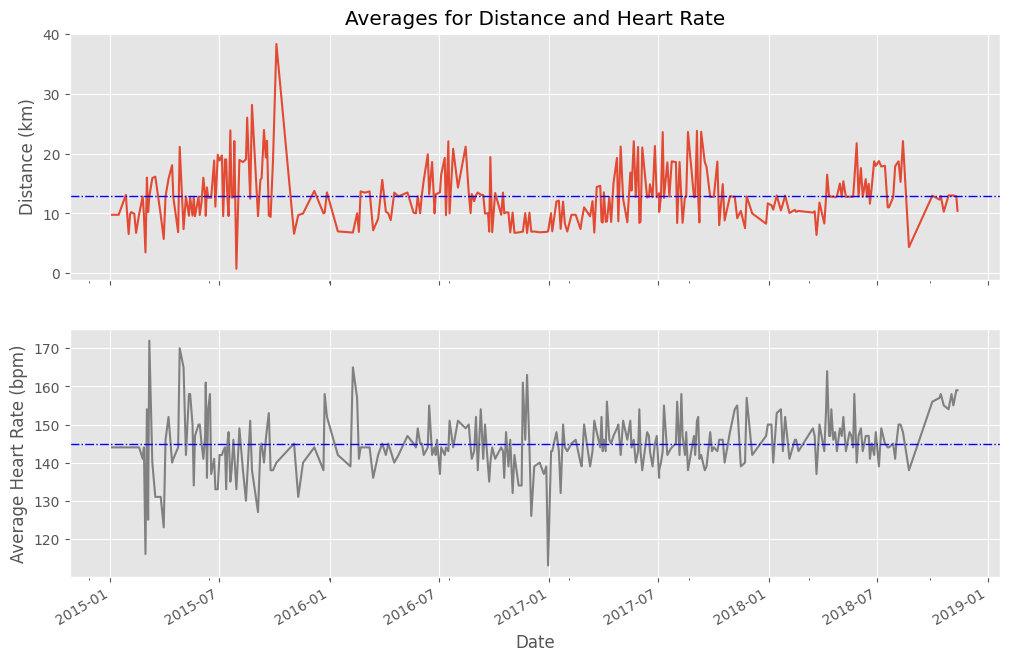

In [7]:
runs_distance = runs_subset_2015_2018['Distance (km)']
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)']
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))
runs_distance.plot(ax=ax1)
ax1.set(ylabel='Distance (km)', title='Averages for Distance and Heart Rate')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')
runs_hr.plot(ax=ax2, color='gray')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color='blue', linewidth=1, linestyle='-.')
plt.show()

## Target checking

A target goal of running 1000 km per year was set, how to proceed with checking if the goal was met ? In order to do so, we'll use the same ```resample()``` method to group annually and sum the distances ran. 

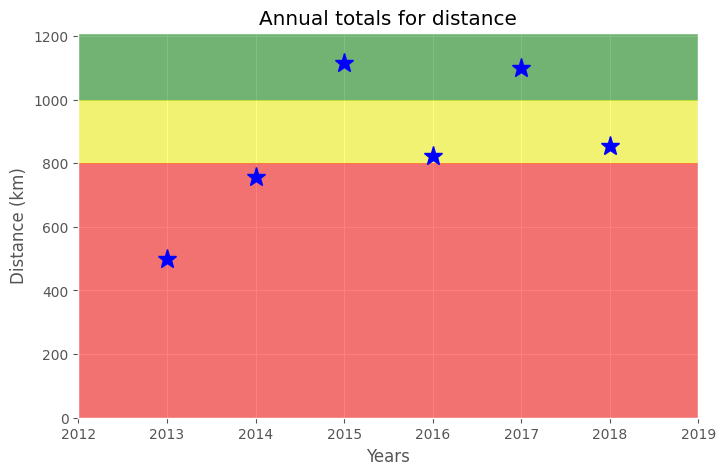

In [8]:
df_run_dist_annual = df_run.sort_index()['20130101':'20181231']['Distance (km)'] \
                    .resample('YE').sum()
fig = plt.figure(figsize=(8, 5))
ax = df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, 
                             color='blue')
ax.set(ylim=[0, 1210], 
       xlim=['2012','2019'],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual totals for distance')
ax.axhspan(1000, 1210, color='green', alpha=0.5)
ax.axhspan(800, 1000, color='yellow', alpha=0.5)
ax.axhspan(0, 800, color='red', alpha=0.5)
plt.show()

## Assessing progress

In order to visualize progress, we'll decompose the weekly distance run and visually compare it to the raw data. A red trend line will represent the weekly distance run.<br>
We'll use the ```statsmodels``` library to decompose the weekly trend.

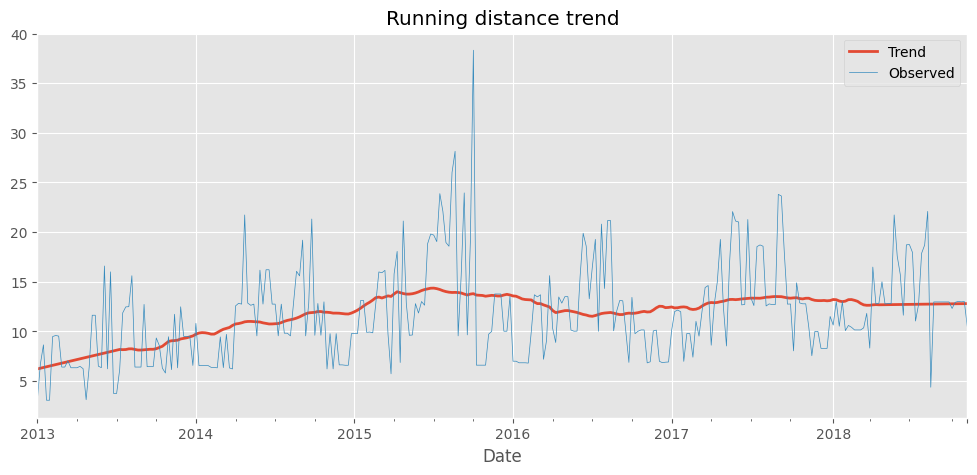

In [9]:
df_run_dist_wkly = df_run.loc['20130101':'20190101']['Distance (km)'] \
                    .resample('W').bfill()
decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, 
                                       extrapolate_trend=1, period=52)
fig = plt.figure(figsize=(12, 5))
ax = decomposed.trend.plot(label='Trend', linewidth=2)
ax = decomposed.observed.plot(label='Observed', linewidth=0.5)
ax.legend()
ax.set_title('Running distance trend')
plt.show()

## Analyzing heart rate data

Target heart rate ranges from 50–70% of maximal heart rate during moderate-intensity exercise to 70–85% of maximum heart rate during strenuous physical activity. So, we can predefine the training zones according to the heart rate ranges, then create a distribution plot of the heart rate data by training intensity.

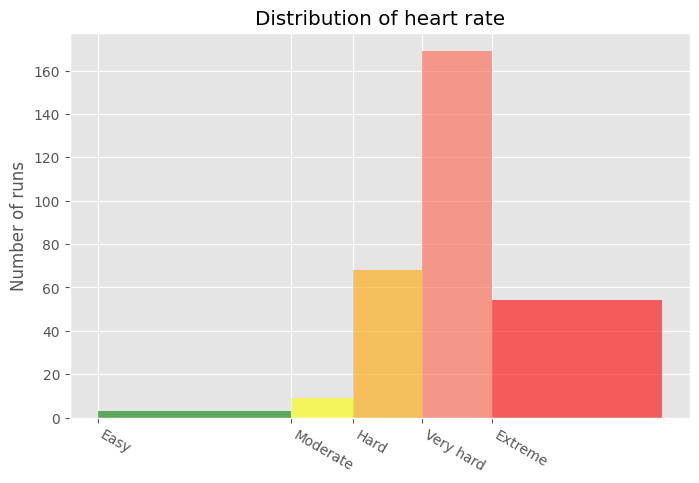

In [10]:
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Extreme']
zone_colors = ['green', 'yellow', 'orange', 'tomato', 'red']
df_run_hr_all = df_run.loc['20150101':'20190101']['Average Heart Rate (bpm)']
fig, ax = plt.subplots(figsize=(8, 5))
n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.6)
for i in range(0, len(patches)):
    patches[i].set_facecolor(zone_colors[i])
ax.set(title='Distribution of heart rate', ylabel='Number of runs')
ax.set_xticks(hr_zones[:-1])
ax.set_xticklabels(labels=zone_names, rotation=-30, ha='left')
plt.show()

## Summary report

Finally, we can summarize all the data cleaning, analysis and visualization we have done. We'll do so by creating summary tables. The first table will be a summary of the distance (km) and climb (m) variables for each training activity, and the second table will list the summary statistics for the average speed (km/hr), climb (m), and distance (km) variables for each training activity.

In [11]:
df_run_walk_cycle = pd.concat([df_run, df_walk, df_cycle]).sort_index(ascending=False)
dist_climb_cols, speed_col = ['Distance (km)', 'Climb (m)'], ['Average Speed (km/h)']
df_totals = df_run_walk_cycle.groupby('Type')[dist_climb_cols].sum()
print('Totals for different training types:')
display(df_totals)
df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe()
for i in dist_climb_cols:
    df_summary[i, 'total'] = df_totals[i]
print('Summary statistics for different training types:')
df_summary.stack(future_stack=True)

Totals for different training types:


,Distance (km),Climb (m)
Type,,
Cycling,680.58,6976
Running,5224.50,57278
Walking,33.45,349


Summary statistics for different training types:


Distance (km)     Climb (m)  Average Speed (km/h)
Type                                                            
Cycling count      29.000000     29.000000             29.000000
        mean       23.468276    240.551724             19.125172
        std         9.451040    128.960289              3.257100
        min        11.410000     58.000000             11.380000
        25%        15.530000    139.000000             16.980000
        50%        20.300000    199.000000             19.500000
        75%        29.400000    318.000000             21.490000
        max        49.180000    553.000000             24.330000
        total     680.580000   6976.000000                   NaN
Running count     459.000000    459.000000            459.000000
        mean       11.382353    124.788671             11.056296
        std         4.937853    103.382177              0.953273
        min         0.760000      0.000000              5.770000
        25%         7.415000     54.000000             10.495000
        50%        10.810000     91.000000             10.980000
        75%        13.190000    171.000000             11.520000
        max        38.320000    982.000000             20.720000
        total    5224.500000  57278.000000                   NaN
Walking count      18.000000     18.000000             18.000000
        mean        1.858333     19.388889              5.549444
        std         0.880055     27.110100              1.459309
        min         1.220000      5.000000              1.040000
        25%         1.385000      7.000000              5.555000
        50%         1.485000     10.000000              5.970000
        75%         1.787500     15.500000              6.512500
        max         4.290000    112.000000              6.910000
        total      33.450000    349.000000                   NaN